In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("C:/Users/dhatr/Downloads/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape


(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#data cleaning
df2=df1.drop(['area_type','society','balcony'],axis='columns')
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\dhatr\AppData\Local\Temp\ipykernel_812\329588128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [10]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3[df3.BHK>20]

,availability,location,size,total_sqft,bath,price,BHK
1718,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3.total_sqft.unique() #to check sqft & if any total_sqft is in range

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
#converts x ie size to float here if it is not in range ie int here
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head() # ~ gives rows which dont come in is_float() =>they are in range

,availability,location,size,total_sqft,bath,price,BHK
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
#total_sqft range values are split by - and their avg is taken
def convert_sqft_to_num(x):
    token=x.split('-')
    if len(token)== 2:
        return (float(token[0])+float(token[1])/2)
    try:
               return float(x)
    except:
                     return None
                     
                     
                   

In [16]:
convert_sqft_to_num('2100-2850') #to test fn


3525.0

In [17]:
df4=df3.copy() #deepcopy of data frame(df3) done to df4
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num) #sqft range values in df4 are made into avg's by the fn by calling in apply()
df4.head(5)

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft'] #price_per_sqft is caluculated by price & total_sqft
df5.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
#too many columns leads to too much feature ,dimnesions and levels -->dimenisonality curse
len(df5.location.unique()) #no of unique locations

1304

In [20]:
#dimensionality reduction -to see if loc has similar 2 datapoints
df5.location=df5.location.apply(lambda x:x.strip()) #space on left &rt side on either side of loction removed by strip() in apply()
loc_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [21]:
#any location that is included less than 10 times is stored in a variable as it can be negligable
loc_less_than10=loc_stats[loc_stats<=10]
loc_less_than10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [22]:
len(df5.location.unique()) #unique locations in df5 seen

1293

In [23]:
df5.location=df5.location.apply(lambda x:'other' if x in loc_less_than10 else x) #for locations occuring <10 it is assigned as 10 as negligable

In [24]:
len(df5.location.unique()) #with others , now less  unique locations are there =>dimensionality reduction  

271

In [25]:
#max 300 sqft is possible per room so, data doesnt match this needs to be removed
df5.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
#removing outliers as mentioned in prev comment
df6=df5[~(df5.total_sqft/df5.BHK<300)] #3300 sqft not followed rows are removed using ~  & are now in df6 
df6.shape #no fo rows & columns in df6 (now reduced a bit)

(12502, 8)

In [27]:
df6.price_per_sqft.describe() #tells the statistical info about price_per_sqft in df6

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
#find mean,std deviation for every loc n if it doesnt comes out of that range (m-st,m+st)=> it is outlier, then remove it
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for et,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)

In [29]:
df7.shape

(10200, 8)

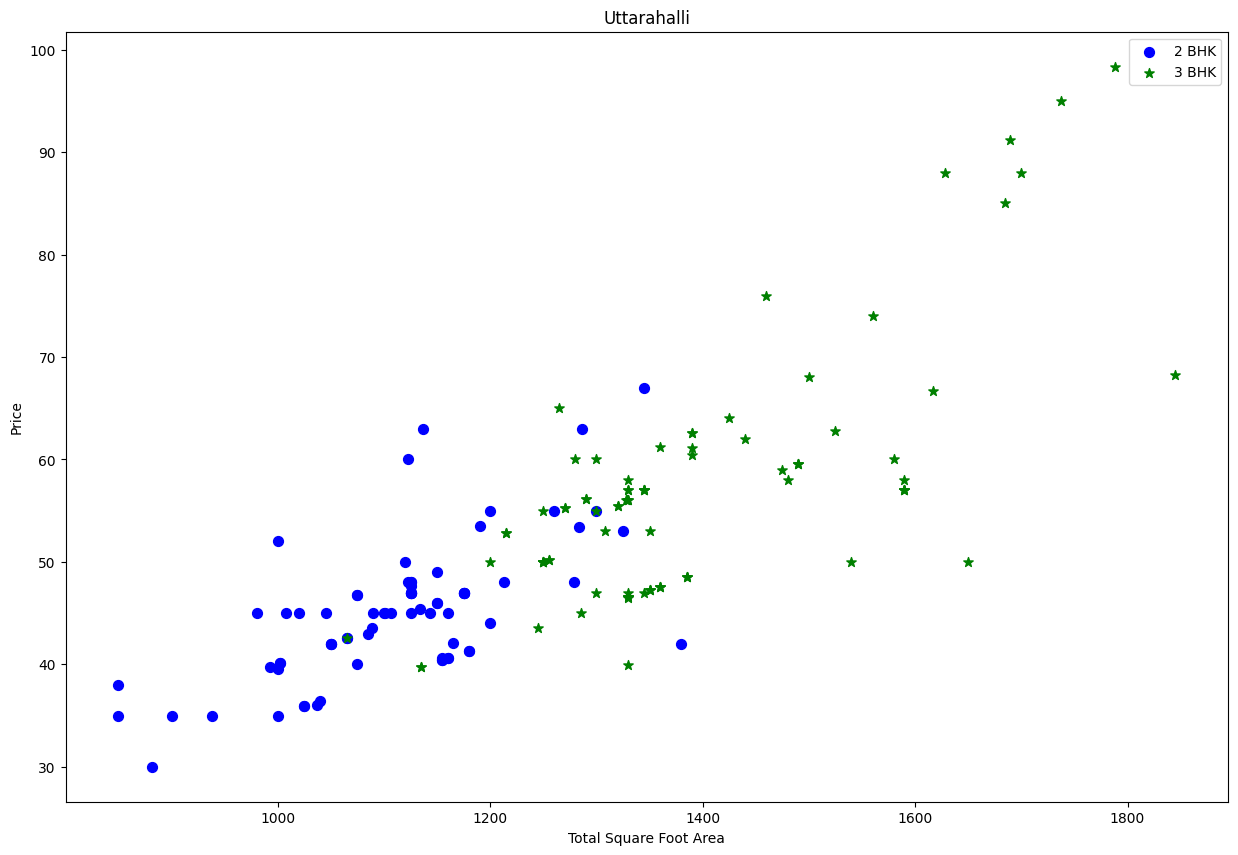

In [30]:
#scatter plots for 2bhk,3bhk 
# we see if for same sqft ,is 2 bhk cost>3bhk cost =>as completely not possible 
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Foot Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot(df7,"Uttarahalli")    

In [31]:
#to remove rows(as they are outliers) where i(eg 2) bhk apts have more cost than mean than i+1(eg 3) bhk apts 
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    bhk_stats={}
    for loc,loc_df in df.groupby('location'):
        bhk_stats={} #dict to store mean,std deviation for each bhk
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[bhk]={
             'mean':np.mean(bhk_df.price_per_sqft),
              'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            for bhk,bh_df in loc_df.groupby('BHK'):
                stats=bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')                

In [32]:
df8=remove_bhk_outliers(df7)
df8.shape

(5054, 8)

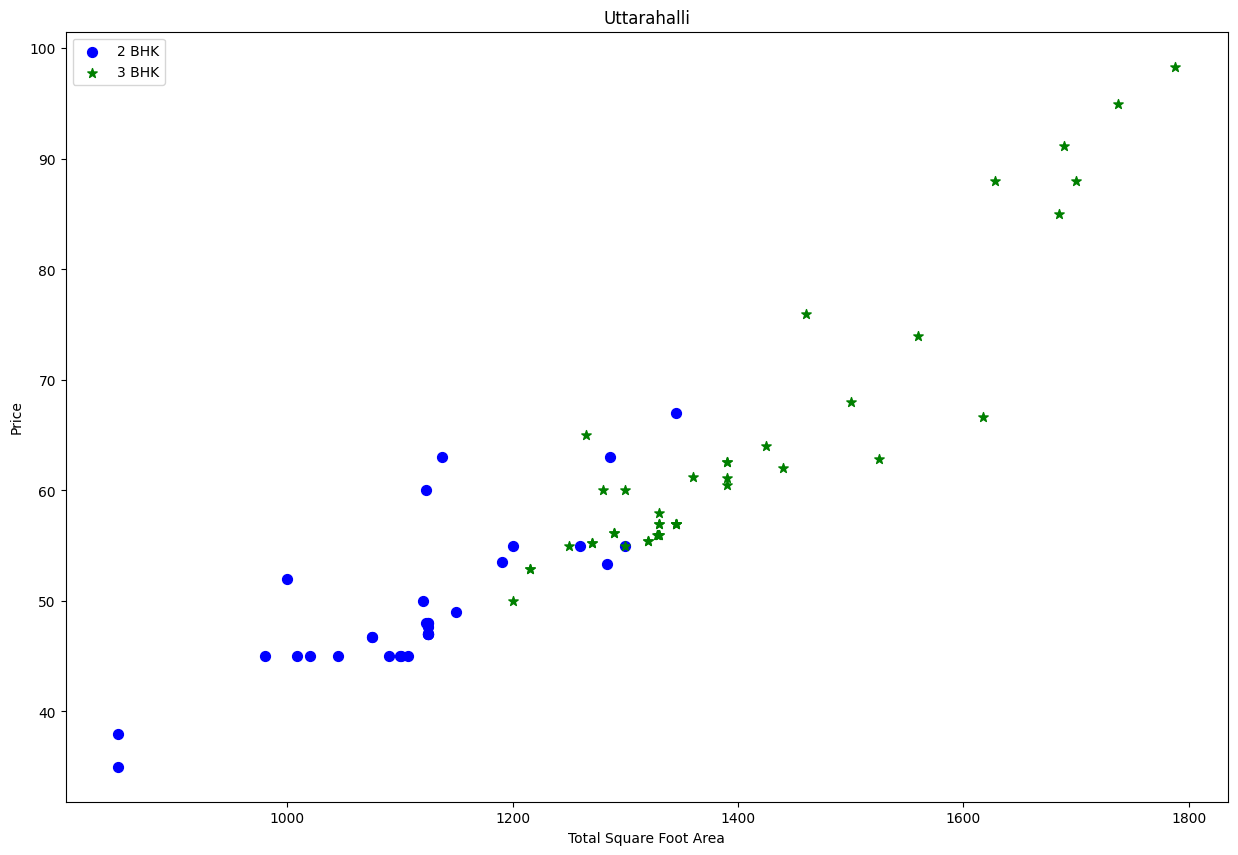

In [33]:
scatter_plot(df8,"Uttarahalli")

Text(0, 0.5, 'Count')

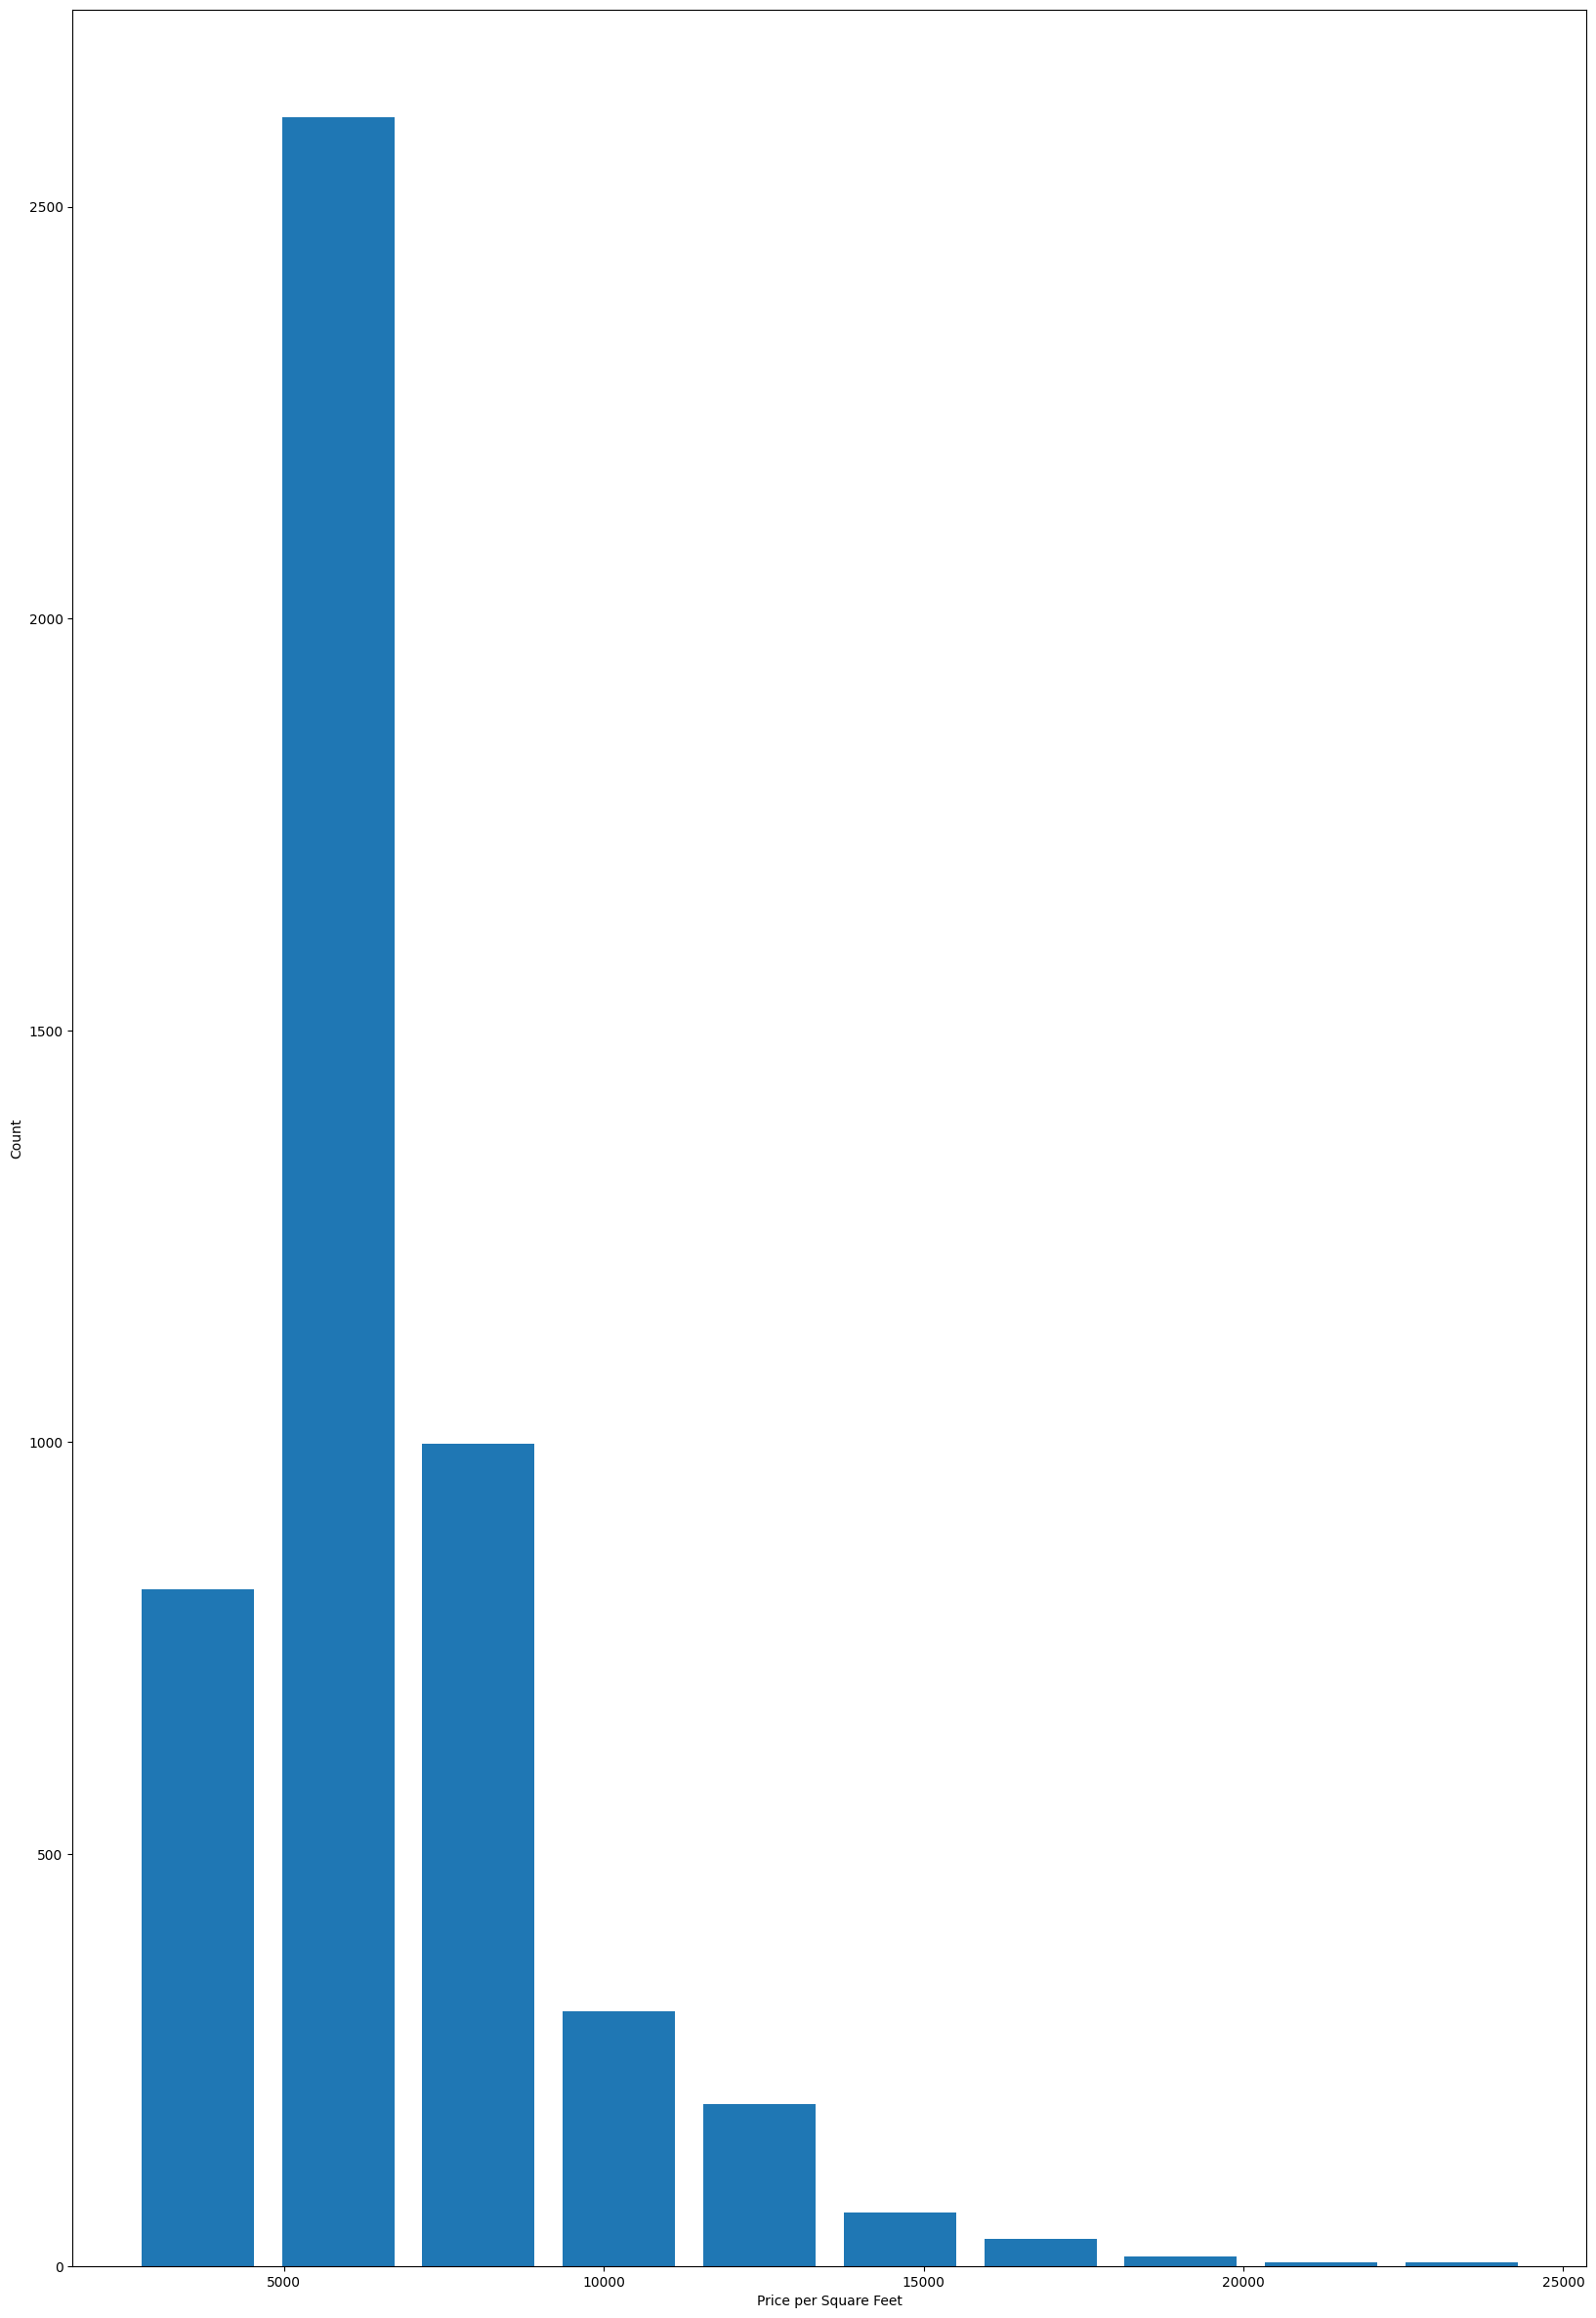

In [34]:

import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,30)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [35]:
df8.bath.unique() #unique value of bathrooms


array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12.])

In [36]:
df8[df8.bath>10]

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
5270,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0


Text(0, 0.5, 'Count')

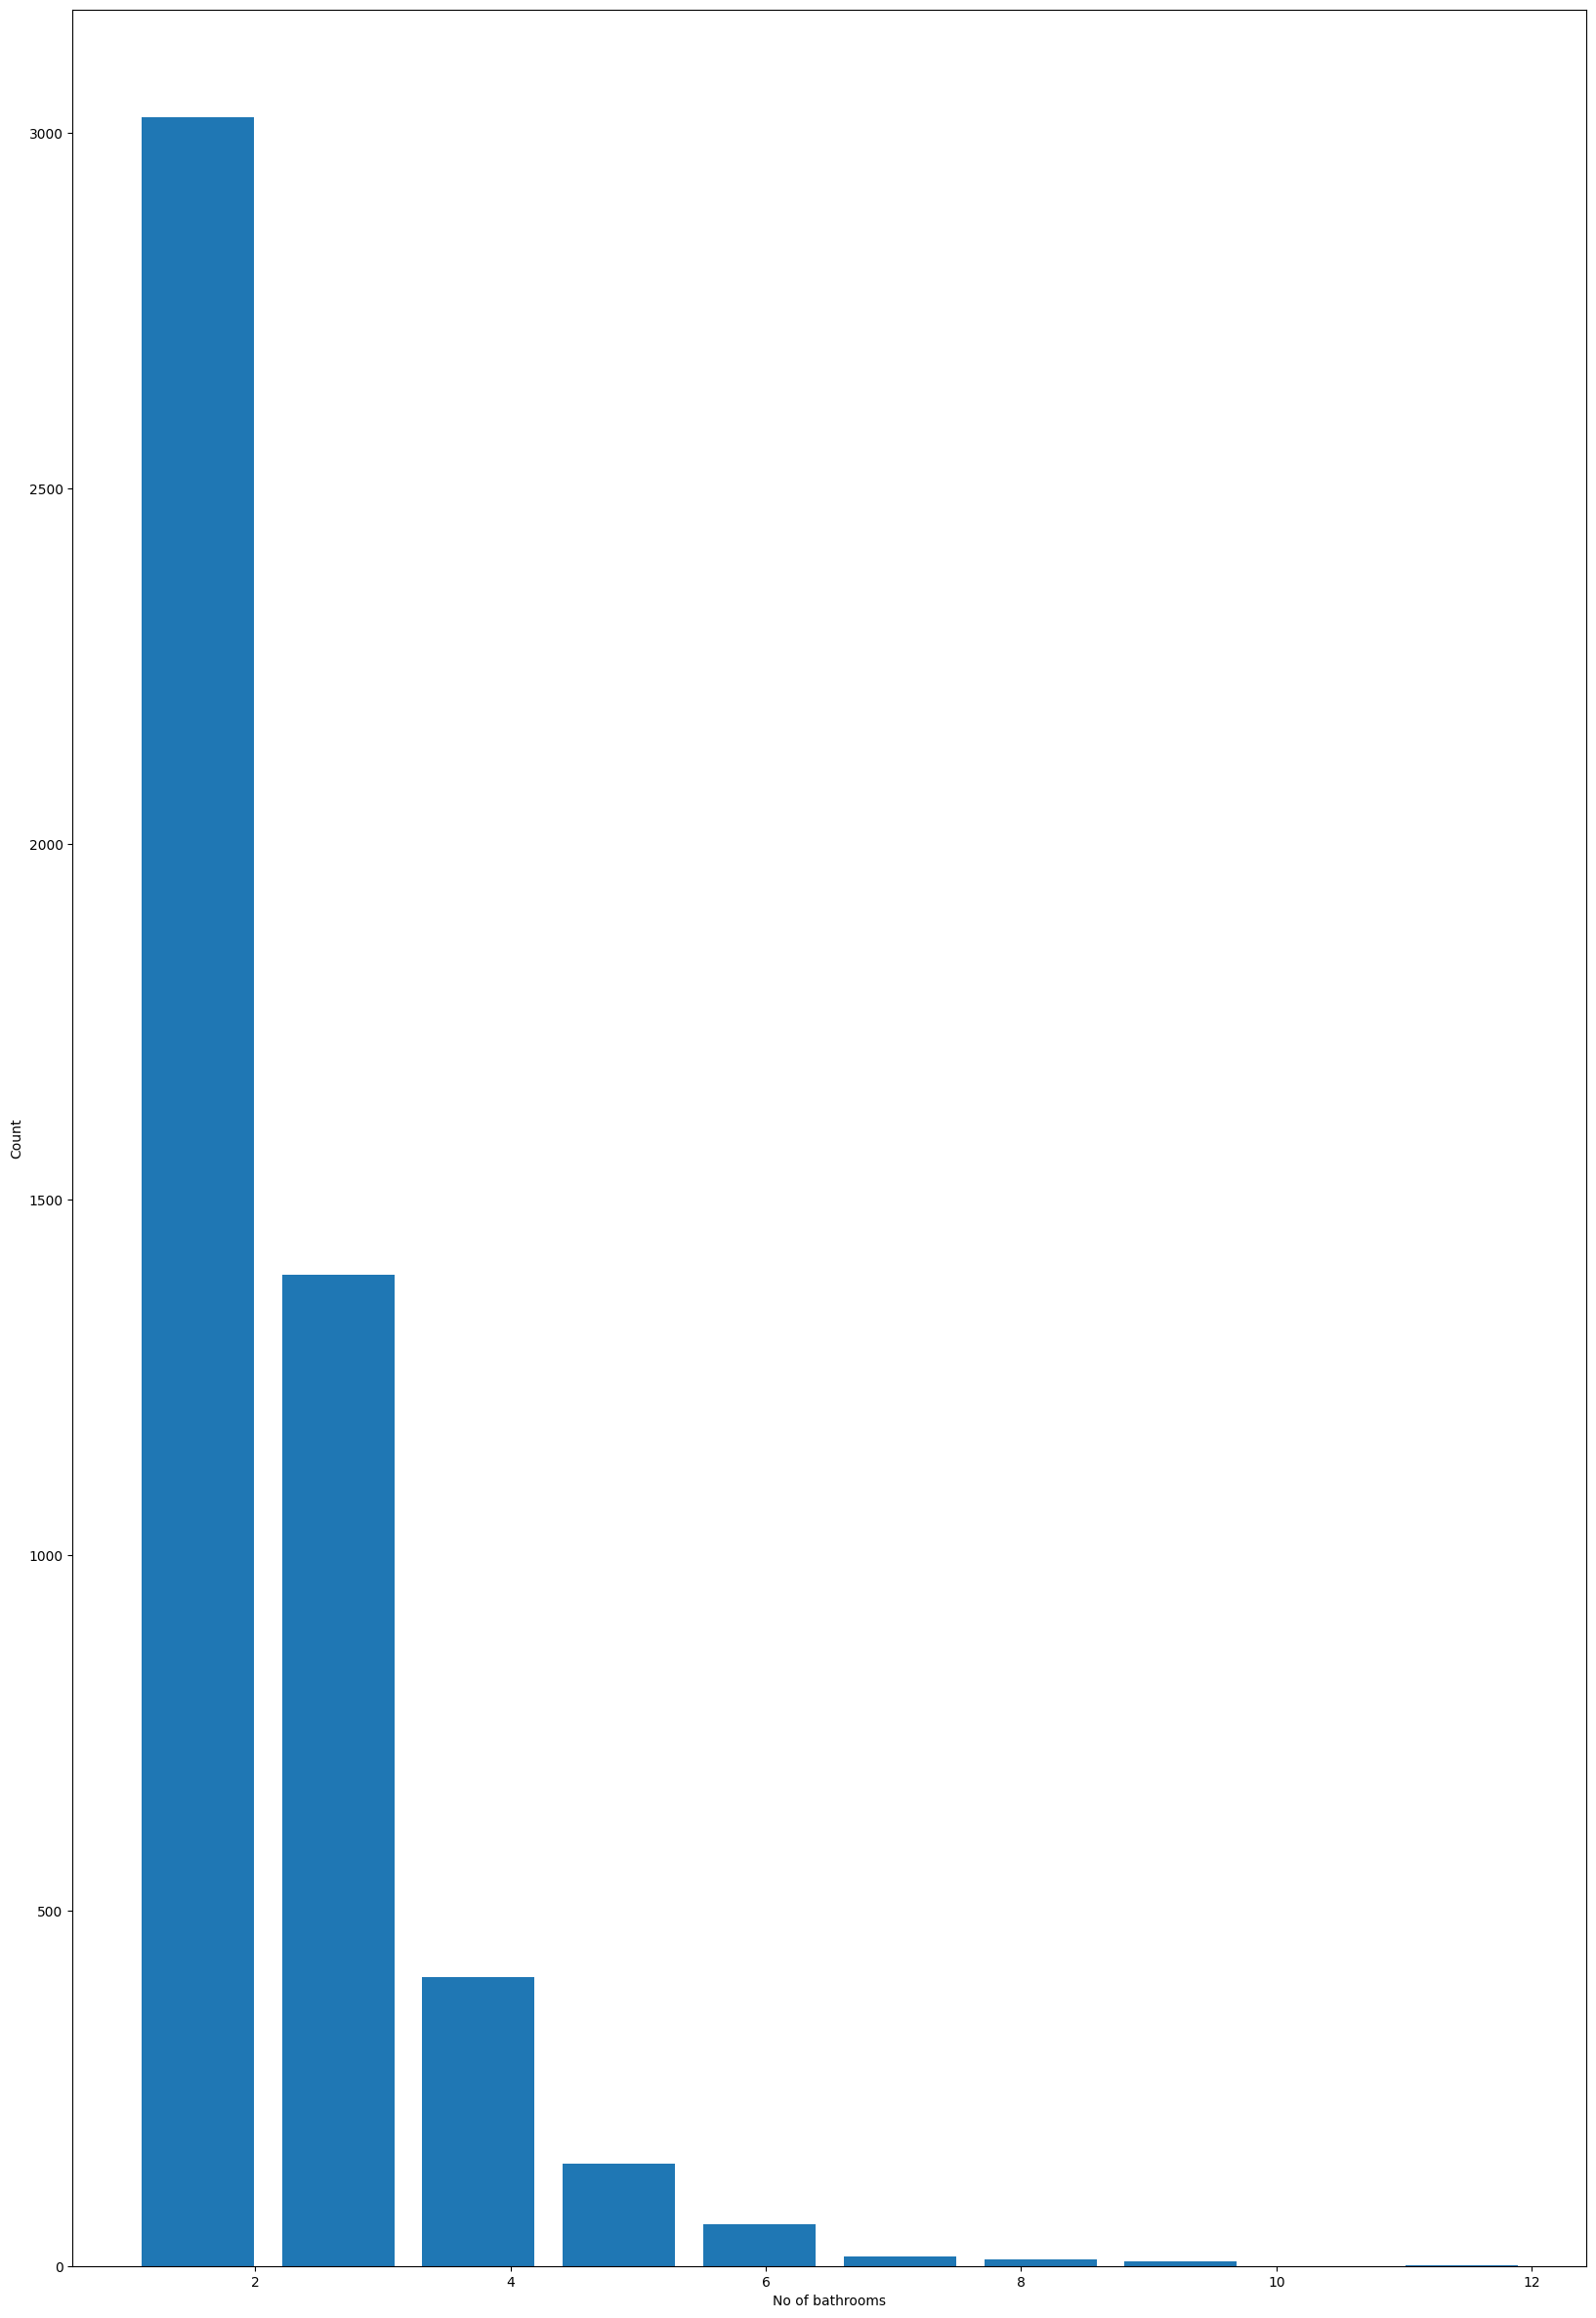

In [37]:
#no of bath rooms shouldnt be more than no of bedrooms+2
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("Count")

In [38]:
#check if rows have no of bathrooms>bhk+2, its not practical
df8[df8.bath>df8.BHK+2]

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
1625,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5231,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6712,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8406,Ready To Move,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [39]:
#if rows with bathrooms<bhk+2 included in df9
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(4990, 8)

In [40]:
#size,price_per_sqft not required so removed
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,availability,location,total_sqft,bath,price,BHK
0,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4
1,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3
4,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2


In [41]:
#since model cant understand text,loc values are converted to dummies,if loc present in row it is 1 else 0
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#by pd,concatenate df10,dummies(with removing others as they are not reqd) & store in df11
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,availability,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#remove loc n availiability as they are text
df12=df11.drop(['location','availability'],axis='columns')
df12.shape
#data cleaning,removing ouliers,feature engineering(dimensionality reduction) done

(4990, 257)

In [44]:
#training for prediction started 
#X is used df for all data except price ,as they are used for prediction & they are dependent data
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#price is the result n independent data
#so it is stored in seperate df,y
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [46]:
#splitting into test n training data 
from sklearn.model_selection  import train_test_split
#20% of the datset is used for testing
X_train1, X_test1 ,Y_train1 , y_test1 = train_test_split(X,y,test_size=0.2,random_state=10) #random state is used for controlling randomness

In [47]:
from sklearn.linear_model import LinearRegression
#Machine Learning method -Linear Regression
lr_clf=LinearRegression()
#fit() used for training model (here for linear regression)
lr_clf.fit(X_train1,Y_train1)
#to see how reliable and strong model is,score() is used
lr_clf.score(X_test1,y_test1)

-194389128248396.62

In [48]:
#shuffle split is used shuffle data randomly so that distribution is uniform
from sklearn.model_selection import ShuffleSplit
#cross validation -statistical technique for  training,evaluating model
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0) #shuffled data ert 20% dataset as testran

cross_val_score(lr_clf,X,y,cv=cv)  #array storing score of estimator of scores of cross validation

array([ 8.19974108e-01,  8.87116804e-01, -1.12126941e+14,  7.98762228e-01,
       -1.43558758e+15])

In [49]:
#GridSearchCV implements a “fit” and a “score” method.
from sklearn.model_selection import GridSearchCV
#linear regression model with l1
from sklearn.linear_model import Lasso
#decision tree regression method
from sklearn.tree import DecisionTreeRegressor

#to check which method is better by gridsearchcv 
def find_best_model_gridsearchcv(X,y):
    #algos dict to store model & parameters 
    algos={
        'linear_regression' : {
         'model':LinearRegression(),
         'params': {
           'normalize':[True,False]
         }
        },
        'lasso':{
            'model':Lasso(),
        'params':{
           'alpha':[1,2],
            'selection':['random','cyclic']
          }
        },
        'decision_tree':{
         'model':DecisionTreeRegressor(),
          'params':{
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
          }
        }
     }
    scores=[] #scores of the methods 
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0) #shuffling for proper distrubution
    for algo_name,config in algos.items(): #going through each algo item and gridSearchCV that uses model,papramters,cv etc
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False) #model made as gridSearchCV
        gs.fit(X,y) #model trained 
        scores.append({ #dict stored as  list item in score which has model ,score,parameters are stored
        'model':algo_name,
         'best_score':gs.best_score_,
         'best_params':gs.best_params_   
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])  #dataframe having score & relevant data returned  

In [50]:
find_best_model_gridsearchcv(X,y) #we see score of the models and best one can be chosen

,model,best_score,best_params
0,linear_regression,-3.095429e+14,{'normalize': False}
1,lasso,6.965908e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,6.687546e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [51]:
#now,method is chosen =>linear regression method
#fn to predict prices wrt loc,sqft,bath,bhk 
def predict_price(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index>=0:
        x[loc_index]=1 
    return lr_clf.predict([x])[0]    #using linear regression ,prediction done

In [52]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Whitefield,',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'south'],
      dtype='object', length=256)

In [53]:
predict_price('1st Phase JP Nagar',1000,2,2) #price predicted for a region in terms of lakhs

99.9783639887196

In [54]:
predict_price('1st Phase JP Nagar',1000,2,3) #test cases...

99.34795062981081

In [55]:
predict_price('Indira Nagar',1000,2,1)

205.21050778100752

In [56]:
predict_price('Indira Nagar',1000,3,3)

204.34381200708174

In [57]:
#saving file in .pickle for flask server
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [58]:
#data saved in json file
import json
columns={
'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))